In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
House_price_df = pd.read_csv(r"C:\Users\palan\Downloads\Housing.csv")

In [4]:
House_price_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
0,3150000,1650,3,1,2,no,no,yes,no,0,unfurnished
1,1890000,1700,3,1,2,yes,no,no,no,0,unfurnished
2,2275000,1836,2,1,1,no,no,yes,no,0,semi-furnished
3,4340000,1905,5,1,2,no,no,yes,no,0,semi-furnished
4,3430000,1950,3,2,2,yes,no,yes,no,0,unfurnished


In [5]:
House_price_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,furnishingstatus
540,3500000,12944,3,1,1,yes,no,no,no,0,unfurnished
541,9800000,13200,3,1,2,yes,no,yes,yes,1,furnished
542,6930000,13200,2,1,1,yes,no,yes,no,1,furnished
543,5943000,15600,3,1,1,yes,no,no,yes,1,semi-furnished
544,10150000,16200,5,3,2,yes,no,no,no,0,unfurnished


In [6]:
House_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  furnishingstatus  545 non-null    object
dtypes: int64(6), object(5)
memory usage: 47.0+ KB


In [7]:
House_price_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.451376
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.498087
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000


In [8]:
House_price_df.shape

(545, 11)

In [13]:
House_price_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'airconditioning', 'parking',
       'furnishingstatus'],
      dtype='object')

In [9]:
House_price_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [10]:
House_price_df.duplicated().sum()

0

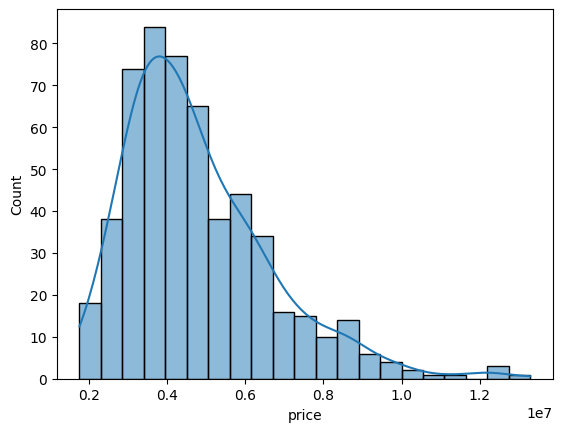

In [12]:
sns.histplot(House_price_df['price'], kde=True)
plt.show()

In [14]:
binary_cols = [
    'mainroad',
    'guestroom',
    'basement',
    'airconditioning'
]

House_price_df[binary_cols] = House_price_df[binary_cols].apply(
    lambda x: x.map({'yes': 1, 'no': 0})
)


In [15]:
House_price_df = pd.get_dummies(
    House_price_df,
    columns=['furnishingstatus'],
    drop_first=True
)


In [16]:
X = House_price_df.drop('price', axis=1)
y = House_price_df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)

R2 Score: 0.5047069400802859
MAE: 861852.1265639394


In [19]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=300, random_state=42)

In [20]:
y_pred = rf.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.5224109109282113
MAE: 825689.4637738239


In [22]:
with open("House_price_model.pkl", "wb") as file:
    pickle.dump(rf, file)